<a href="https://colab.research.google.com/github/abhinavoo7/Sentimental-Analysis/blob/main/Sentiment_Analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiental Analysis

We have gathered 100-150 reviews on android using google survey form

## Unsupervised TextBlob Analysis


In [ ]:
# importing data
import pandas as pd
data = pd.read_csv("E:\Ps-2\Data Sets\Android Survey\Android Survey.csv", header=0)
data.head()

,Timestamp,Name,E-mail,Android Version / Name,Reviews,Tru_Sentiment
0,6/17/2020 17:51,Abhinav Gupta,abhinav.gupta.18cse@bmu.edu.in,9,This is a good version. It enhances our phone ...,Positive
1,6/17/2020 18:02,Shivam Tripathi,tripathi.shivamraghavesh.18cse@bmu.edu.in,9,Satisfied,Positive
2,6/17/2020 18:03,Shivang Ahuja,shivang24042k@gmail.com,9,Great experience,Positive
3,6/17/2020 18:05,Ali Aryan,ali.aryan.18csc@bmu.edu.in,7,I found the iOS to be very flexible and open. ...,Neutral
4,6/17/2020 18:06,Mithila Reddy,m.mithila.16cse@bml.edu.in,10,The system performance is okay. There are not ...,Positive


In [ ]:
data.describe()

,Timestamp,Name,E-mail,Android Version / Name,Reviews,Tru_Sentiment
count,124,124,124,124,124,124
unique,112,124,124,5,86,3
top,6/17/2020 19:00,Shikhar Agarwal,sunbas50@gmail.com,9,Good,Positive
freq,3,1,1,60,17,96


In [ ]:
Reviews = data['Reviews']
True_Sentiment = data['Tru_Sentiment']

In [ ]:
import pandas as pd

dataf = pd.DataFrame.from_dict(Reviews)
dataf

,Reviews
0,This is a good version. It enhances our phone ...
1,Satisfied
2,Great experience
3,I found the iOS to be very flexible and open. ...
4,The system performance is okay. There are not ...
...,...
119,IOS is faster than android and interfacing of ...
120,Op
121,Horrible! Phone hangs after 1 year use and is ...
122,"Fabulous!, Baught this as a gift for father. H..."


In [ ]:
dataf['True_Sentiment'] = True_Sentiment
dataf

,Reviews,True_Sentiment
0,This is a good version. It enhances our phone ...,Positive
1,Satisfied,Positive
2,Great experience,Positive
3,I found the iOS to be very flexible and open. ...,Neutral
4,The system performance is okay. There are not ...,Positive
...,...,...
119,IOS is faster than android and interfacing of ...,Negative
120,Op,Neutral
121,Horrible! Phone hangs after 1 year use and is ...,Negative
122,"Fabulous!, Baught this as a gift for father. H...",Positive


In [ ]:
# Function to remove punctuations, alphanumeric/numeric. It also converts in lowercase.
import re
import string

def cleaning(content):    
    content = "".join([char for char in content if char not in string.punctuation])
    content = re.sub('[0-9]*', '', content)
    content = content.lower()
    return content

In [ ]:
# Cleaning reviews by running cleaning function
clean_data = pd.DataFrame(dataf.Reviews.apply(cleaning))
clean_data['True_Sentiment'] = True_Sentiment
clean_data

,Reviews,True_Sentiment
0,this is a good version it enhances our phone c...,Positive
1,satisfied,Positive
2,great experience,Positive
3,i found the ios to be very flexible and open i...,Neutral
4,the system performance is okay there are not m...,Positive
...,...,...
119,ios is faster than android and interfacing of ...,Negative
120,op,Neutral
121,horrible phone hangs after year use and is ve...,Negative
122,fabulous baught this as a gift for father happ...,Positive


In [ ]:
# Pickling clean data for future use
clean_data.to_pickle("corrpus.pkl")

In [ ]:
count = {}
for line in clean_data.Reviews:
    words = line.split()
    for word in words:    count[word] = count.get(word, 0) + 1
count

{'this': 13,
 'is': 30,
 'a': 18,
 'good': 62,
 'version': 14,
 'it': 21,
 'enhances': 1,
 'our': 1,
 'phone': 11,
 'capabilities': 1,
 'satisfied': 1,
 'great': 9,
 'experience': 10,
 'i': 29,
 'found': 6,
 'the': 33,
 'ios': 5,
 'to': 21,
 'be': 8,
 'very': 21,
 'flexible': 2,
 'and': 40,
 'open': 2,
 'provides': 6,
 'all': 10,
 'functionalities': 2,
 'comes': 2,
 'in': 10,
 'various': 3,
 'price': 4,
 'ranges': 2,
 'but': 7,
 'issue': 2,
 'with': 7,
 'that': 8,
 'since': 2,
 'many': 5,
 'companies': 2,
 'android': 27,
 'they': 4,
 'have': 7,
 'their': 2,
 'own': 2,
 'layer': 2,
 'above': 2,
 'stock': 3,
 'causes': 2,
 'late': 2,
 'updates': 7,
 'rest': 2,
 'everything': 2,
 'fine': 5,
 'system': 3,
 'performance': 4,
 'okay': 2,
 'there': 3,
 'are': 11,
 'not': 15,
 'given': 3,
 'overall': 5,
 'of': 23,
 'mobile': 4,
 'security': 1,
 'patch': 1,
 'level': 1,
 'must': 1,
 'updated': 2,
 'regularly': 1,
 'comfortable': 2,
 'happy': 2,
 'ui': 1,
 'time': 2,
 'has': 1,
 'come': 1,
 'rel

In [ ]:
# Finding frequency of each word
lst = list()
for key, val in count.items():
    new = (val, key)
    lst.append(new)
lst = sorted(lst, reverse = True)
lst

[(62, 'good'),
 (40, 'and'),
 (33, 'the'),
 (30, 'is'),
 (29, 'i'),
 (27, 'android'),
 (23, 'of'),
 (21, 'very'),
 (21, 'to'),
 (21, 'it'),
 (18, 'a'),
 (16, 'its'),
 (15, 'not'),
 (15, 'for'),
 (14, 'version'),
 (13, 'this'),
 (11, 'phone'),
 (11, 'are'),
 (10, 'in'),
 (10, 'experience'),
 (10, 'all'),
 (9, 'use'),
 (9, 'so'),
 (9, 'great'),
 (8, 'that'),
 (8, 'nice'),
 (8, 'be'),
 (7, 'with'),
 (7, 'user'),
 (7, 'updates'),
 (7, 'have'),
 (7, 'but'),
 (6, 'provides'),
 (6, 'my'),
 (6, 'me'),
 (6, 'friendly'),
 (6, 'found'),
 (6, 'as'),
 (5, 'using'),
 (5, 'overall'),
 (5, 'many'),
 (5, 'ios'),
 (5, 'get'),
 (5, 'fine'),
 (5, 'features'),
 (5, 'excellent'),
 (5, 'best'),
 (5, 'been'),
 (4, 'they'),
 (4, 'slow'),
 (4, 'price'),
 (4, 'performance'),
 (4, 'other'),
 (4, 'os'),
 (4, 'more'),
 (4, 'mobile'),
 (4, 'love'),
 (4, 'dont'),
 (4, 'bad'),
 (4, 'apps'),
 (4, 'am'),
 (3, 'year'),
 (3, 'would'),
 (3, 'working'),
 (3, 'wanted'),
 (3, 'various'),
 (3, 'tiresome'),
 (3, 'there'),
 (3, 

Since there is no word having more frequency than the word telling about sentiment so we do not need to remove any word except stop words.

In [ ]:
# Creating a document term matrix to count repetition of words so thet we may remove them in future if required.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Reoving stop words
cv = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS)
data_cv = cv.fit_transform(clean_data.Reviews)
dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
dtm.index = clean_data.index
dtm

,access,according,amazing,android,animations,app,apple,apps,arent,available,...,version,versions,visible,vivo,wanted,week,work,working,year,years
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Pickling document term matrix for future use
dtm.to_pickle("d_t_m")

In [ ]:
import pandas as pd

data = pd.read_pickle('d_t_m')
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
according,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amazing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
android,0,0,0,2,0,0,0,0,0,2,...,3,1,0,0,1,2,0,0,0,0
animations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
week,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
work,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
working,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
year,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
top_wrds = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_wrds[c]= list(zip(top.index, top.values))

top_wrds

{0: [('version', 1),
  ('good', 1),
  ('capabilities', 1),
  ('phone', 1),
  ('enhances', 1),
  ('gift', 0),
  ('given', 0),
  ('gives', 0),
  ('glad', 0),
  ('glitches', 0),
  ('years', 0),
  ('gesture', 0),
  ('google', 0),
  ('great', 0),
  ('half', 0),
  ('hanged', 0),
  ('hangs', 0),
  ('getting', 0),
  ('functioning', 0),
  ('galaxy', 0),
  ('happy', 0),
  ('functionality', 0),
  ('functionalities', 0),
  ('friendly', 0),
  ('friend', 0),
  ('foe', 0),
  ('flipkart', 0),
  ('flexible', 0),
  ('fine', 0),
  ('feel', 0)],
 1: [('satisfied', 1),
  ('glitches', 0),
  ('gesture', 0),
  ('getting', 0),
  ('gift', 0),
  ('given', 0),
  ('gives', 0),
  ('glad', 0),
  ('years', 0),
  ('functioning', 0),
  ('good', 0),
  ('google', 0),
  ('great', 0),
  ('half', 0),
  ('hanged', 0),
  ('hangs', 0),
  ('galaxy', 0),
  ('functionality', 0),
  ('face', 0),
  ('functionalities', 0),
  ('friendly', 0),
  ('friend', 0),
  ('foe', 0),
  ('flipkart', 0),
  ('flexible', 0),
  ('fine', 0),
  ('feel'

In [ ]:
# Print the top words in each content
for key, top_words in top_wrds.items():
    print(key)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('\n\n')

0
version, good, capabilities, phone, enhances, gift, given, gives, glad, glitches



1
satisfied, glitches, gesture, getting, gift, given, gives, glad, years, functioning



2
experience, great, years, glitches, getting, gift, given, gives, glad, google



3
android, provides, open, flexible, causes, functionalities, price, stock, ios, updates



4
performance, updates, version, okay, good, given, mobile, overall, flexible, fine



5
patch, regularly, level, security, updated, gives, galaxy, gesture, getting, gift



6
comfortable, ui, happy, faster, getting, happiest, hangs, hanged, half, great



7
good, years, galaxy, happiest, hangs, hanged, half, great, google, glitches



8
good, years, galaxy, happiest, hangs, hanged, half, great, google, glitches



9
android, updates, glitches, getting, release, come, time, correction, gift, given



10
good, years, galaxy, happiest, hangs, hanged, half, great, google, glitches



11
good, feel, years, getting, gift, given, gives, glad, glitc

In [ ]:
# Look at the most common top words 
words = []
for key in data.columns:
    top = [word for (word, count) in top_wrds[key]]
    for t in top:
        words.append(t)        
words

['version',
 'good',
 'capabilities',
 'phone',
 'enhances',
 'gift',
 'given',
 'gives',
 'glad',
 'glitches',
 'years',
 'gesture',
 'google',
 'great',
 'half',
 'hanged',
 'hangs',
 'getting',
 'functioning',
 'galaxy',
 'happy',
 'functionality',
 'functionalities',
 'friendly',
 'friend',
 'foe',
 'flipkart',
 'flexible',
 'fine',
 'feel',
 'satisfied',
 'glitches',
 'gesture',
 'getting',
 'gift',
 'given',
 'gives',
 'glad',
 'years',
 'functioning',
 'good',
 'google',
 'great',
 'half',
 'hanged',
 'hangs',
 'galaxy',
 'functionality',
 'face',
 'functionalities',
 'friendly',
 'friend',
 'foe',
 'flipkart',
 'flexible',
 'fine',
 'feel',
 'features',
 'feature',
 'father',
 'experience',
 'great',
 'years',
 'glitches',
 'getting',
 'gift',
 'given',
 'gives',
 'glad',
 'google',
 'good',
 'galaxy',
 'half',
 'hanged',
 'hangs',
 'happiest',
 'gesture',
 'functioning',
 'facing',
 'functionality',
 'functionalities',
 'friendly',
 'friend',
 'foe',
 'flipkart',
 'flexible',


In [ ]:
# importing data
import pandas as pd

data = pd.read_pickle('corrpus.pkl')
data

,Reviews,True_Sentiment
0,this is a good version it enhances our phone c...,Positive
1,satisfied,Positive
2,great experience,Positive
3,i found the ios to be very flexible and open i...,Neutral
4,the system performance is okay there are not m...,Positive
...,...,...
119,ios is faster than android and interfacing of ...,Negative
120,op,Neutral
121,horrible phone hangs after year use and is ve...,Negative
122,fabulous baught this as a gift for father happ...,Positive


Analyzing reviews using unsupervised analysis of TextBlob

In [ ]:
# Assigning polarity to reviews
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity

data['Polarity'] = data['Reviews'].apply(pol)
data

,Reviews,True_Sentiment,Polarity
0,this is a good version it enhances our phone c...,Positive,0.700000
1,satisfied,Positive,0.500000
2,great experience,Positive,0.800000
3,i found the ios to be very flexible and open i...,Neutral,0.177083
4,the system performance is okay there are not m...,Positive,0.237500
...,...,...,...
119,ios is faster than android and interfacing of ...,Negative,-0.350000
120,op,Neutral,0.000000
121,horrible phone hangs after year use and is ve...,Negative,-0.695000
122,fabulous baught this as a gift for father happ...,Positive,0.404167


In [ ]:
# Creating a column by assigning sentiment based on polarity of each review
def sentiment (row):
   if row['Polarity'] > 0 :
      return 'Positive'
   elif row['Polarity'] < 0 :
      return 'Negative'
   else:
        return 'Neutral'

In [ ]:
# Printing dataframe with assigned polarity and sentiment values
data['TextBlob_Sentiment'] = data.apply (lambda row: sentiment(row), axis=1)
data

,Reviews,True_Sentiment,Polarity,TextBlob_Sentiment
0,this is a good version it enhances our phone c...,Positive,0.700000,Positive
1,satisfied,Positive,0.500000,Positive
2,great experience,Positive,0.800000,Positive
3,i found the ios to be very flexible and open i...,Neutral,0.177083,Positive
4,the system performance is okay there are not m...,Positive,0.237500,Positive
...,...,...,...,...
119,ios is faster than android and interfacing of ...,Negative,-0.350000,Negative
120,op,Neutral,0.000000,Neutral
121,horrible phone hangs after year use and is ve...,Negative,-0.695000,Negative
122,fabulous baught this as a gift for father happ...,Positive,0.404167,Positive


In [ ]:
data.describe()

,Polarity
count,124.000000
mean,0.489450
std,0.396550
min,-0.700000
25%,0.275568
50%,0.604167
75%,0.700000
max,1.000000


In [ ]:
data.True_Sentiment.describe()

count          124
unique           3
top       Positive
freq            96
Name: True_Sentiment, dtype: object

In [ ]:
data.TextBlob_Sentiment.describe()

count          124
unique           3
top       Positive
freq           107
Name: TextBlob_Sentiment, dtype: object

In [ ]:
count = {}
for text in data['TextBlob_Sentiment']:
    count[text] = count.get(text, 0) + 1
count

{'Positive': 107, 'Neutral': 8, 'Negative': 9}

<BarContainer object of 3 artists>

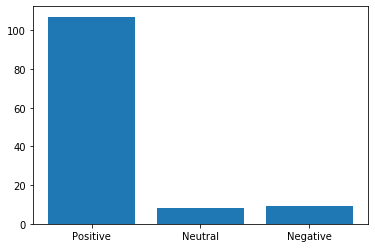

In [ ]:
# Visualising output using bar graph
import matplotlib.pyplot as plt
keys = count.keys()
values = count.values()
plt.bar(keys, values)

In [ ]:
actual = data['True_Sentiment']
predicted = data['TextBlob_Sentiment']

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(actual,predicted, labels=['Positive', 'Negative', 'Neutral'])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[95  1  0]
 [ 7  8  1]
 [ 5  0  7]]


In [ ]:
# Accuracy calculation using confusion matrix
num = 0
denom = 0
for i in range(3):
    for j in range(3):
        if i == j:
            num += matrix[i][j]
        denom += matrix[i][j]
accuracy = num/denom
accuracy

0.8870967741935484

In [ ]:
# Function that returns value for accuracy calculation
def accuracy(row):
    tp = 0
    tn = 0
    tnu = 0
    fp = 0
    fn = 0
    fnu = 0
    if row['True_Sentiment'] == row['TextBlob_Sentiment']:
        if row['TextBlob_Sentiment'] == 'Positive': tp += 1
        elif row['TextBlob_Sentiment'] == 'Negative': tn += 1
        else: tnu += 1
    else:
        if row['TextBlob_Sentiment'] == 'Positive': fp += 1
        elif row['TextBlob_Sentiment'] == 'Negative': fn += 1
        else: fnu += 1
    return (tp + tn + tnu)/(tp + tn + tnu + fp + fn + fnu)

In [ ]:
acc = sum(data.apply(lambda row: accuracy(row), axis=1))/124
acc

0.8870967741935484

In [ ]:
print('Accuracy', acc*100, '%')

Accuracy 88.70967741935483 %


## Vader Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

ob = SentimentIntensityAnalyzer() 

In [ ]:
polarity = lambda x: ob.polarity_scores(x)

data['Vader_Polarity'] = dataf['Reviews'].apply(polarity)
data

,Reviews,True_Sentiment,Polarity,TextBlob_Sentiment,Vader_Polarity
0,this is a good version it enhances our phone c...,Positive,0.700000,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
1,satisfied,Positive,0.500000,Positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,great experience,Positive,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,i found the ios to be very flexible and open i...,Neutral,0.177083,Positive,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp..."
4,the system performance is okay there are not m...,Positive,0.237500,Positive,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp..."
...,...,...,...,...,...
119,ios is faster than android and interfacing of ...,Negative,-0.350000,Negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
120,op,Neutral,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
121,horrible phone hangs after year use and is ve...,Negative,-0.695000,Negative,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp..."
122,fabulous baught this as a gift for father happ...,Positive,0.404167,Positive,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp..."


In [ ]:
# Compound provides us with sentient
def sent (row):
   if row['compound'] > 0.05 :
      return 'Positive'
   elif row['compound'] < -0.05 :
      return 'Negative'
   else:
        return 'Neutral'

In [ ]:
data['Vader_Sentiment'] = data.Vader_Polarity.apply (lambda row: sent(row))
data

,Reviews,True_Sentiment,Polarity,TextBlob_Sentiment,Vader_Polarity,Vader_Sentiment
0,this is a good version it enhances our phone c...,Positive,0.700000,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",Positive
1,satisfied,Positive,0.500000,Positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive
2,great experience,Positive,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",Positive
3,i found the ios to be very flexible and open i...,Neutral,0.177083,Positive,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",Positive
4,the system performance is okay there are not m...,Positive,0.237500,Positive,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",Positive
...,...,...,...,...,...,...
119,ios is faster than android and interfacing of ...,Negative,-0.350000,Negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",Negative
120,op,Neutral,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
121,horrible phone hangs after year use and is ve...,Negative,-0.695000,Negative,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp...",Negative
122,fabulous baught this as a gift for father happ...,Positive,0.404167,Positive,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp...",Positive


In [ ]:
data.Vader_Sentiment.describe()

count          124
unique           3
top       Positive
freq            99
Name: Vader_Sentiment, dtype: object

In [ ]:
count = {}
for text in data['Vader_Sentiment']:
    count[text] = count.get(text, 0) + 1
count

{'Positive': 99, 'Neutral': 9, 'Negative': 16}

<BarContainer object of 3 artists>

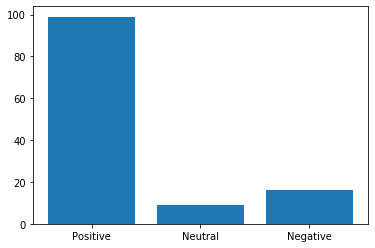

In [ ]:
# Visualising output using bar graph
import matplotlib.pyplot as plt
keys = count.keys()
values = count.values()
plt.bar(keys, values)

In [ ]:
actual = data['True_Sentiment']
predicted2 = data['Vader_Sentiment']

In [ ]:
matrix = confusion_matrix(actual,predicted2, labels=['Positive', 'Negative', 'Neutral'])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[90  1  5]
 [ 2 13  1]
 [ 7  2  3]]


In [ ]:
def accuracy(row):
    tp = 0
    tn = 0
    tnu = 0
    fp = 0
    fn = 0
    fnu = 0
    if row['True_Sentiment'] == row['Vader_Sentiment']:
        if row['Vader_Sentiment'] == 'Positive': tp += 1
        elif row['Vader_Sentiment'] == 'Negative': tn += 1
        else: tnu += 1
    else:
        if row['Vader_Sentiment'] == 'Positive': fp += 1
        elif row['Vader_Sentiment'] == 'Negative': fn += 1
        else: fnu += 1
    return (tp + tn + tnu)/(tp + tn + tnu + fp + fn + fnu)

In [ ]:
accuracy = sum(data.apply(lambda row: accuracy(row), axis=1))/124
accuracy

0.8548387096774194

In [ ]:
print('Accuracy', accuracy*100, '%')

Accuracy 85.48387096774194 %


## Supervised TextBlob Analysis

In [ ]:
# importing data
import pandas as pd
tra = pd.read_csv("E:\Ps-2\Data Sets\Android Survey\Android Survey.csv", header=0)
tra

,Timestamp,Name,E-mail,Android Version / Name,Reviews,Tru_Sentiment
0,6/17/2020 17:51,Abhinav Gupta,abhinav.gupta.18cse@bmu.edu.in,9,This is a good version. It enhances our phone ...,Positive
1,6/17/2020 18:02,Shivam Tripathi,tripathi.shivamraghavesh.18cse@bmu.edu.in,9,Satisfied,Positive
2,6/17/2020 18:03,Shivang Ahuja,shivang24042k@gmail.com,9,Great experience,Positive
3,6/17/2020 18:05,Ali Aryan,ali.aryan.18csc@bmu.edu.in,7,I found the iOS to be very flexible and open. ...,Neutral
4,6/17/2020 18:06,Mithila Reddy,m.mithila.16cse@bml.edu.in,10,The system performance is okay. There are not ...,Positive
...,...,...,...,...,...,...
119,6/18/2020 22:19,Keshav Raheja,keshav.raheja15@gmail.com,-,IOS is faster than android and interfacing of ...,Negative
120,6/18/2020 22:34,SOHAM,sohamlodhi108@gmail.com,10,Op,Neutral
121,6/19/2020 1:34,Sajal Gupta,sajalcool20@gmail.com,9,Horrible! Phone hangs after 1 year use and is ...,Negative
122,6/19/2020 16:40,Fabulous!,singingsoul420@gmail.com,9,"Fabulous!, Baught this as a gift for father. H...",Positive


In [ ]:
# Selecting a training sample of 24 values
train = tra[75:109]
train

,Timestamp,Name,E-mail,Android Version / Name,Reviews,Tru_Sentiment
75,6/18/2020 14:06,Vikas,vikasdeep2017@gmail.com,8,Bad,Negative
76,6/18/2020 14:06,Shalu,shalu2009@gmail.com,10,Makes life easier so good,Positive
77,6/18/2020 14:55,Alankriti Garg,allyimagination10@gmail.com,8,The features available in this version of Andr...,Positive
78,6/18/2020 14:58,Amit Bansal,amitbansalrinku@gmail.com,8,Too good,Positive
79,6/18/2020 14:58,Prayrit Bhutty,prayrit143@gmail.com,9,Nice,Positive
80,6/18/2020 15:08,Pankaj,pankaj20@gmail.com,8,Superb,Positive
81,6/18/2020 15:44,Amit Judge,amit.judge20@gmail.com,9,fabulous but some times lag,Positive
82,6/18/2020 16:22,Dr Ravi Bhushan Kansal,KANSAL.RAVI89@gmail.com,8,Excellent,Positive
83,6/18/2020 16:31,Dr Chhavi Gupta,guptadrchhavi@gmail.com,9,Excellent,Positive
84,6/18/2020 16:35,Rashi Garg,rashigarg720@gmail.com,10,good,Positive


In [ ]:
# Tuples for training model
t = tuple(zip(train['Reviews'], train['Tru_Sentiment']))
t

(('Bad', 'Negative'),
 ('Makes life easier so good', 'Positive'),
 ('The features available in this version of Android are really convenient and conforms to latest technical requirements, good.',
  'Positive'),
 ('Too good', 'Positive'),
 ('Nice', 'Positive'),
 ('Superb', 'Positive'),
 ('fabulous but some times lag ', 'Positive'),
 ('Excellent ', 'Positive'),
 ('Excellent ', 'Positive'),
 ('good', 'Positive'),
 ('Not bad', 'Neutral'),
 ('No ssues', 'Neutral'),
 ('Nice', 'Positive'),
 ("Facing memory issues all the time, Very slow processor also keeps demanding system updates every week and half the features aren't efficient any more.",
  'Negative'),
 ('not so good', 'Negative'),
 ('not so good', 'Negative'),
 ('Good', 'Positive'),
 ("I am using a Poco F1, so due to MIUI I don't get the real stock Android experience. Though overall OS experience is good. \n\nSignificant improvements in terms of data and privacy protection are visible in this version.",
  'Neutral'),
 ('Good one', 'Posi

In [ ]:
# Training using Naive Bayes Classifier
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(t)

In [ ]:
clas = lambda x: cl.classify(x)

data['Naive_Sentiment'] = data['Reviews'].apply(clas)
data

,Reviews,True_Sentiment,Polarity,TextBlob_Sentiment,Vader_Polarity,Vader_Sentiment,Naive_Sentiment
0,this is a good version it enhances our phone c...,Positive,0.700000,Positive,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",Positive,Positive
1,satisfied,Positive,0.500000,Positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive,Positive
2,great experience,Positive,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",Positive,Positive
3,i found the ios to be very flexible and open i...,Neutral,0.177083,Positive,"{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",Positive,Neutral
4,the system performance is okay there are not m...,Positive,0.237500,Positive,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",Positive,Positive
...,...,...,...,...,...,...,...
119,ios is faster than android and interfacing of ...,Negative,-0.350000,Negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",Negative,Negative
120,op,Neutral,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Positive
121,horrible phone hangs after year use and is ve...,Negative,-0.695000,Negative,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'comp...",Negative,Negative
122,fabulous baught this as a gift for father happ...,Positive,0.404167,Positive,"{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp...",Positive,Positive


In [ ]:
data.Naive_Sentiment.describe()

count          124
unique           3
top       Positive
freq           105
Name: Naive_Sentiment, dtype: object

In [ ]:
count = {}
for text in data['Naive_Sentiment']:
    count[text] = count.get(text, 0) + 1
count

{'Positive': 105, 'Neutral': 5, 'Negative': 14}

<BarContainer object of 3 artists>

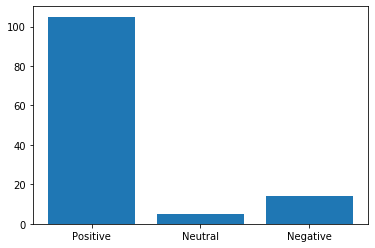

In [ ]:
# Visualising output using bar graph
import matplotlib.pyplot as plt
keys = count.keys()
values = count.values()
plt.bar(keys, values)

In [ ]:
actual = data['True_Sentiment']
predicted3 = data['Naive_Sentiment']

In [ ]:
matrix = confusion_matrix(actual,predicted3, labels=['Positive', 'Negative', 'Neutral'])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[88  6  2]
 [ 7  8  1]
 [10  0  2]]


In [ ]:
diag = 0
for i in range(3):
    for j in range(3):
        if i == j:
            diag += matrix[i][j]
tot = 0
for i in range(3):
    for j in range(3):
        tot += matrix[i][j]
ac = diag/tot
ac

0.7903225806451613

In [ ]:
print('Accuracy', ac*100, '%')

Accuracy 79.03225806451613 %


The accuray is less than unsupervised TextBlob analysis

# Result

Since unsupervised analysis using TextBlob gives us the best accuracy i.e. 0.887, so we will use it